In [ ]:

!nvidia-smi

Thu Aug 24 15:29:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, Flatten,Dense,GlobalAveragePooling2D

import numpy as np

In [ ]:
IMAGE_SIZE=[224,224]

train_path="/content/drive/MyDrive/tech triathlon/Datathon-Dataset/train"
test_path="/content/drive/MyDrive/tech triathlon/Datathon-Dataset/test"

In [ ]:
inception= InceptionV3(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainnable=False

In [ ]:
from glob import glob

In [ ]:
folders=glob("/content/drive/MyDrive/tech triathlon/Datathon-Dataset/train/**")

In [ ]:
folders

['/content/drive/MyDrive/tech triathlon/Datathon-Dataset/train/category2_tumor',
 '/content/drive/MyDrive/tech triathlon/Datathon-Dataset/train/no_tumor',
 '/content/drive/MyDrive/tech triathlon/Datathon-Dataset/train/category1_tumor',
 '/content/drive/MyDrive/tech triathlon/Datathon-Dataset/train/category3_tumor']

In [ ]:
x=inception.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)



In [ ]:
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/tech triathlon/Datathon-Dataset/test/",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 119 images belonging to 4 classes.


In [ ]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/tech triathlon/Datathon-Dataset/train/",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 3105 images belonging to 4 classes.


In [ ]:
my_model=model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/20
98/98 [==============================] - 996s 10s/step - loss: 0.6279 - accuracy: 0.7842 - val_loss: 3.0188 - val_accuracy: 0.6050
Epoch 2/20
98/98 [==============================] - 58s 593ms/step - loss: 0.3578 - accuracy: 0.8870 - val_loss: 2.4667 - val_accuracy: 0.7731
Epoch 3/20
98/98 [==============================] - 56s 573ms/step - loss: 0.4520 - accuracy: 0.8554 - val_loss: 199.2792 - val_accuracy: 0.2269
Epoch 4/20
98/98 [==============================] - 56s 570ms/step - loss: 0.2795 - accuracy: 0.9050 - val_loss: 1.4303 - val_accuracy: 0.7647
Epoch 5/20
98/98 [==============================] - 55s 564ms/step - loss: 0.2104 - accuracy: 0.9324 - val_loss: 0.7122 - val_accuracy: 0.7647
Epoch 6/20
98/98 [==============================] - 55s 558ms/step - loss: 0.1984 - accuracy: 0.9346 - val_loss: 0.4692 - val_accuracy: 0.8403
Epoch 7/20
98/98 [==============================] - 57s 576ms/step - loss: 0.2776 - accuracy: 0.9111 - val_loss: 1.0934 - val_accuracy: 0.689

In [ ]:
model.save("inceptionv3_model.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/model.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_set.classes

class_names = list(test_set.class_indices.keys())
classification_rep = classification_report(true_labels, predicted_classes, target_names=class_names)
confusion_mat = confusion_matrix(true_labels, predicted_classes)

print("Test Accuracy:", my_model)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)


4/4 [==============================] - 1s 119ms/step
Test Accuracy: <keras.callbacks.History object at 0x7c9b3900ed10>

Classification Report:
                  precision    recall  f1-score   support

category1_tumor       0.25      0.29      0.27        34
category2_tumor       0.06      0.04      0.04        27
category3_tumor       0.17      0.19      0.18        27
       no_tumor       0.23      0.23      0.23        31

       accuracy                           0.19       119
      macro avg       0.17      0.19      0.18       119
   weighted avg       0.18      0.19      0.19       119


Confusion Matrix:
 [[10  6  7 11]
 [11  1 10  5]
 [11  3  5  8]
 [ 8  8  8  7]]


In [ ]:
import matplotlib.pyplot as plt


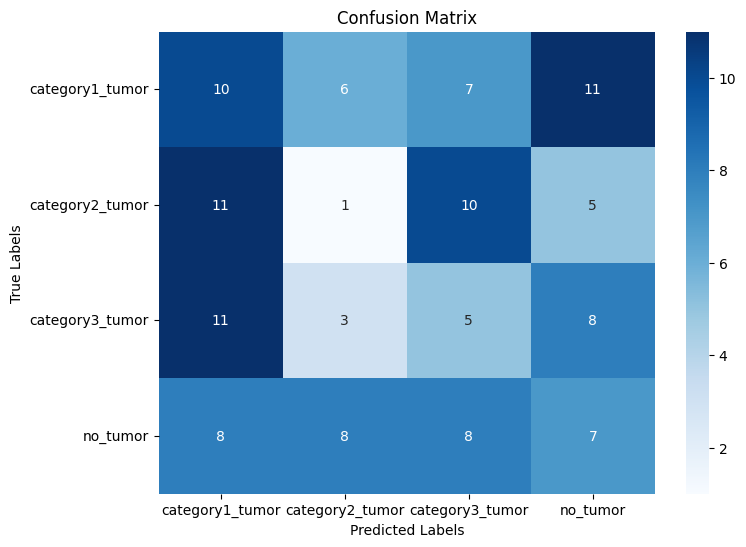

In [ ]:
import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
